In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
file_path = 'D:/Personal/UTSA/Rowdy_Datathon/CommandLineGPT/datasets/JourneyNorth/combined_monarch_sightings_2019_2023.csv'  # our CSV file path
data = pd.read_csv(file_path)

In [6]:
print("Initial Data:")
print(data.head())

Initial Data:
   SNo        Date              Town State/Province  Latitude  Longitude  \
0    1  12/31/2019     Laguna Niguel             CA      33.5     -117.7   
1    2  12/31/2019    Pass Christian             MS      30.3      -89.2   
2    3  12/30/2019  Santa Rosa Beach             FL      30.3      -86.2   
3    4  12/29/2019    Corpus Christi             TX      27.7      -97.3   
4    5  12/28/2019       New Orleans             LA      29.9      -90.1   

   Number  Image  
0     3.0    NaN  
1     1.0    NaN  
2     1.0    NaN  
3     1.0    NaN  
4     1.0    NaN  


In [7]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [8]:
# Check for columns with all missing values
empty_columns = data.columns[data.isnull().all()]
# Print the result
if len(empty_columns) > 0:
    print(f"Empty columns: {list(empty_columns)}")
else:
    print("No empty columns found.")

Empty columns: ['Image']


In [9]:
# Drop the 'Image' column
data_cleaned = data.drop(columns=['Image'])

# Display the shape of the data after dropping the 'Image' column
print(f"Data shape after dropping 'Image' column: {data_cleaned.shape}")

Data shape after dropping 'Image' column: (55219, 7)


In [10]:
# Check for null values in the cleaned data
null_values_cleaned = data_cleaned.isnull().sum()

# Print the number of null values for each column in the cleaned data
print("Null values in each column after cleaning:")
print(null_values_cleaned)

Null values in each column after cleaning:
SNo                0
Date               0
Town              49
State/Province     6
Latitude           0
Longitude          0
Number             2
dtype: int64


In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_cleaned['Number'].quantile(0.25)
Q3 = data_cleaned['Number'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = data_cleaned[(data_cleaned['Number'] < lower_bound) | (data_cleaned['Number'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# Remove outliers from the dataset
data_without_outliers = data_cleaned[(data_cleaned['Number'] >= lower_bound) & (data_cleaned['Number'] <= upper_bound)]

# Check the shape of the dataset after removing outliers
print(f"Data shape after removing outliers: {data_without_outliers.shape}")

Number of outliers detected: 5060
Data shape after removing outliers: (50157, 7)


In [12]:
data_without_outliers.describe()

,SNo,Latitude,Longitude,Number
count,50157.000000,50157.000000,50157.000000,50157.000000
mean,5684.538768,38.083879,-86.801306,1.750364
std,3485.314400,10.006178,14.704291,1.244762
min,1.000000,-37.000000,-157.800000,0.000000
25%,2707.000000,34.700000,-95.300000,1.000000
50%,5547.000000,39.000000,-84.900000,1.000000
75%,8340.000000,41.900000,-77.800000,2.000000
max,14192.000000,1972.000000,1972.000000,6.000000


In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Longitude and Latitude
Q1_longitude = data_without_outliers['Longitude'].quantile(0.25)
Q3_longitude = data_without_outliers['Longitude'].quantile(0.75)
IQR_longitude = Q3_longitude - Q1_longitude

Q1_latitude = data_without_outliers['Latitude'].quantile(0.25)
Q3_latitude = data_without_outliers['Latitude'].quantile(0.75)
IQR_latitude = Q3_latitude - Q1_latitude

# Define bounds for outliers
lower_bound_longitude = Q1_longitude - 1.5 * IQR_longitude
upper_bound_longitude = Q3_longitude + 1.5 * IQR_longitude

lower_bound_latitude = Q1_latitude - 1.5 * IQR_latitude
upper_bound_latitude = Q3_latitude + 1.5 * IQR_latitude

# Identify outliers based on IQR for Longitude and Latitude
outliers_iqr = data_without_outliers[(data_without_outliers['Longitude'] < lower_bound_longitude) | 
                            (data_without_outliers['Longitude'] > upper_bound_longitude) |
                            (data_without_outliers['Latitude'] < lower_bound_latitude) | 
                            (data_without_outliers['Latitude'] > upper_bound_latitude)]

print(f"Number of outliers detected using IQR for Longitude and Latitude: {outliers_iqr.shape[0]}")

# Remove outliers
data_without_outliers_iqr = data_without_outliers[(data_without_outliers['Longitude'] >= lower_bound_longitude) &
                                         (data_without_outliers['Longitude'] <= upper_bound_longitude) &
                                         (data_without_outliers['Latitude'] >= lower_bound_latitude) &
                                         (data_without_outliers['Latitude'] <= upper_bound_latitude)]

# Check the shape of the dataset after removing outliers
print(f"Data shape after removing IQR based outliers: {data_without_outliers_iqr.shape}")


Number of outliers detected using IQR for Longitude and Latitude: 867
Data shape after removing IQR based outliers: (49290, 7)


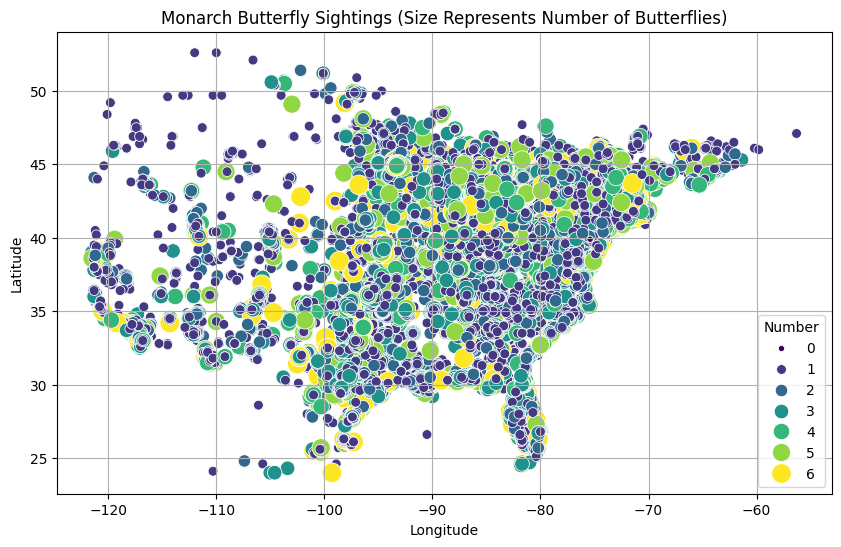

In [14]:
# Number of Sightings by Date
data_cleaned_sorted = data_without_outliers_iqr.sort_values(by='Date')

# Number of Butterflies vs. Latitude/Longitude (Correlation Analysis)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned_sorted, x='Longitude', y='Latitude', hue='Number', size='Number', sizes=(20, 200), palette='viridis')
plt.title('Monarch Butterfly Sightings (Size Represents Number of Butterflies)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

C:\Users\Ubaidullah Khan\AppData\Local\Temp\ipykernel_7008\3520519111.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_data, x='Year', y='Number', palette='viridis')


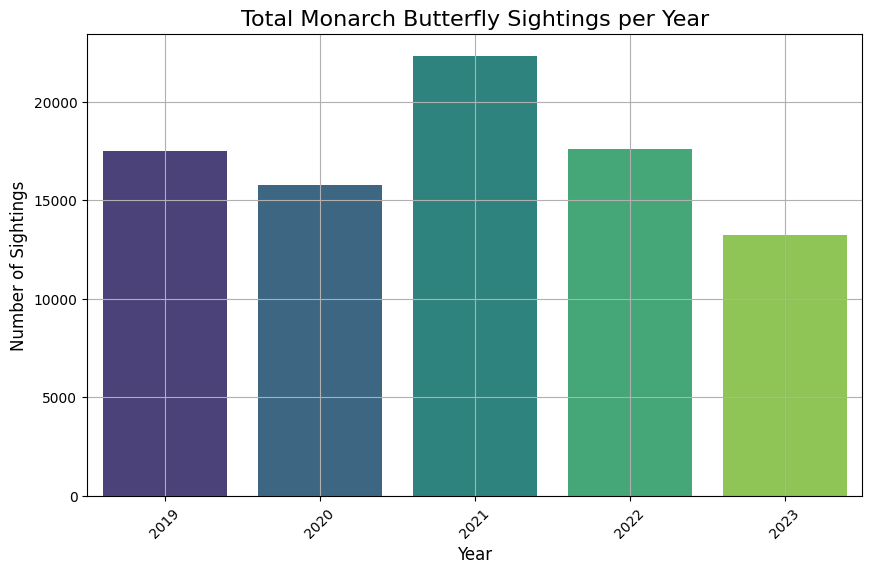

In [15]:
# Step 1: Ensure Date column is in datetime format
data_cleaned_sorted['Date'] = pd.to_datetime(data_cleaned_sorted['Date'])

# Step 2: Extract the year from the Date column and create a new 'Year' column
data_cleaned_sorted['Year'] = data_cleaned_sorted['Date'].dt.year

# Step 3: Group the data by Year and sum the Number of sightings for each year
yearly_data = data_cleaned_sorted.groupby('Year')['Number'].sum().reset_index()

# Step 4: Create a bar plot for yearly butterfly sightings
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_data, x='Year', y='Number', palette='viridis')

# Customize the plot
plt.title('Total Monarch Butterfly Sightings per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sightings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

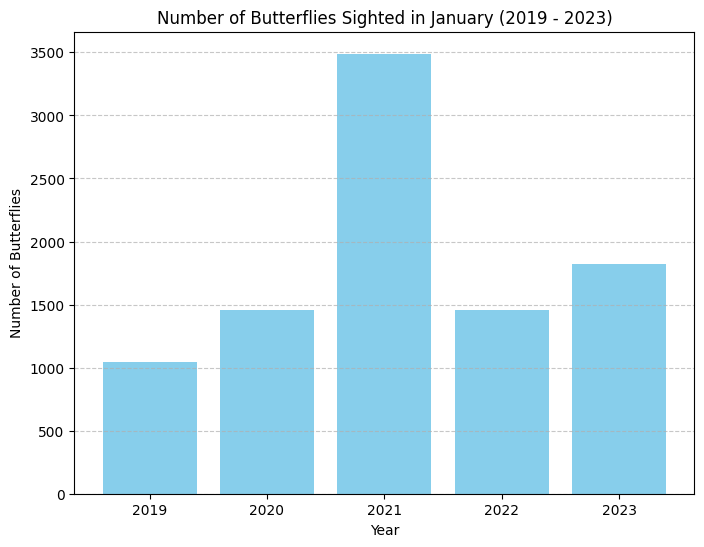

,SNo,Date,Town,State/Province,Latitude,Longitude,Number,Image
73,74,2019-11-30,Missouri City,TX,29.6,-95.6,2.0,NaN
74,75,2019-11-30,Thermal,CA,33.3,-116.0,1.0,NaN
75,76,2019-11-30,Spring Valley,CA,32.7,-117.0,1.0,NaN
76,77,2019-11-30,Amherstburg,ON,42.0,-83.0,0.0,NaN
77,78,2019-11-29,Clearwater,FL,28.0,-82.8,1.0,NaN


In [16]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter data for January of each year from 2019 to 2023
jan_sightings = data[(data['Date'].dt.month == 11) & (data['Date'].dt.year >= 2019) & (data['Date'].dt.year <= 2023)]

# Group by year and sum the number of butterflies sighted in January for each year
jan_sightings_by_year = jan_sightings.groupby(jan_sightings['Date'].dt.year)['Number'].sum().reset_index()

# Check if the filtered data for January is empty
if jan_sightings_by_year.empty:
    print("No butterfly sightings recorded for the month of January from 2019 to 2023.")
else:
    # Create a bar chart to visualize the number of butterflies sighted in January from 2019 to 2023
    plt.figure(figsize=(8, 6))
    plt.bar(jan_sightings_by_year['Date'], jan_sightings_by_year['Number'], color='skyblue')
    plt.title('Number of Butterflies Sighted in January (2019 - 2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Butterflies')
    plt.xticks(jan_sightings_by_year['Date'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Display the first few rows of the January sightings
jan_sightings.head()
